In [1]:
import sys
import os.path
sys.path.append("../data_pipeline/")

In [2]:
# helps with autoreloading code as we write and test
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

from IPython.display import display

from collections import OrderedDict
import matplotlib.pyplot as plt

# sns and plotting style
import matplotlib as mlp

# mlp.style.use('classic')

import seaborn as sns

# sns.set(style='ticks', palette=sns.color_palette("Set2", 10))
sns.set_style("darkgrid")

mlp.rcParams['axes.titlesize'] = 24
mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['xtick.labelsize'] = 18
mlp.rcParams['ytick.labelsize'] = 18
mlp.rcParams['figure.figsize'] = 15, 10
mlp.rcParams['legend.fontsize']= 20

# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns',500)
# pd.set_option('display.width', 3500)


/Users/tarikmoon/.local/share/virtualenvs/data-pipeline-dykDwJ-s/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
from scrapers.cefi_scraper import CeFiScraper

In [27]:
from scrapers.coingecko_scraper import CoinGeckoScraper

In [29]:
CoinGeckoScraper(assets=["bitcoin"]).get_data()["bitcoin"]

,timestamp,price,datetime
0,1367107200000,135.300000,2013-04-28 00:00:00
1,1367193600000,141.960000,2013-04-29 00:00:00
2,1367280000000,135.300000,2013-04-30 00:00:00
3,1367366400000,117.000000,2013-05-01 00:00:00
4,1367452800000,103.430000,2013-05-02 00:00:00
...,...,...,...
2976,1624406400000,32507.738707,2021-06-23 00:00:00
2977,1624492800000,33702.617794,2021-06-24 00:00:00
2978,1624579200000,34675.449105,2021-06-25 00:00:00
2979,1624665600000,31943.136468,2021-06-26 00:00:00


In [5]:
cs = CeFiScraper(assets=["AMD"])

In [6]:
cs.collect_data()

In [7]:
for a in ["AMD"]:
    display(cs.data[a].head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


<AxesSubplot:xlabel='Date'>

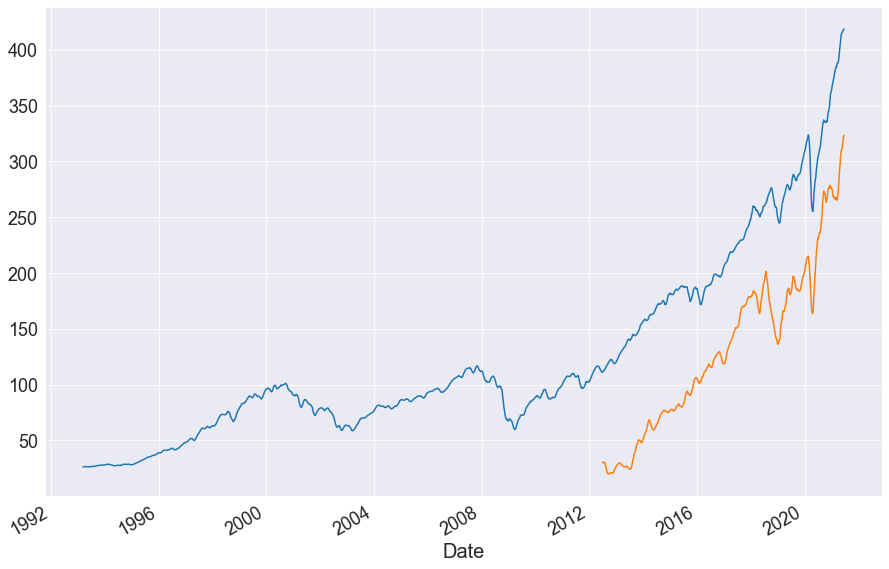

In [13]:
cs.data["SPY"].Open.rolling(30).mean().plot()
cs.data["FB"].Open.rolling(30).mean().plot()

In [ ]:
import time

In [ ]:
time.sleep(2)

In [9]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [10]:
markets = cg.get_coins_markets(vs_currency='usd')

In [14]:
import pandas as pd

In [15]:
pd.DataFrame(markets)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,33359.000000,625655739174,1,7.009791e+11,37871024425,33599.000000,...,2.100000e+07,2.100000e+07,64805.000000,-48.49859,2021-04-14T11:54:46.763Z,67.810000,49119.64072,2013-07-06T00:00:00.000Z,None,2021-06-27T08:26:39.222Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1868.040000,217714270493,2,NaN,25206552965,1894.720000,...,NaN,NaN,4356.990000,-57.11616,2021-05-12T14:41:48.623Z,0.432979,431432.58074,2015-10-20T00:00:00.000Z,"{'times': 73.785311208421, 'currency': 'btc', ...",2021-06-27T08:26:37.466Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.010000,63025194862,3,NaN,67396308435,1.020000,...,6.270715e+10,NaN,1.320000,-24.03632,2018-07-24T00:00:00.000Z,0.572521,75.55197,2015-03-02T00:00:00.000Z,None,2021-06-27T08:00:56.232Z
3,binancecoin,bnb,Binance Coin,https://assets.coingecko.com/coins/images/825/...,283.310000,43756388506,4,4.828681e+10,1654557986,286.980000,...,1.705337e+08,1.705337e+08,686.310000,-58.74275,2021-05-10T07:24:17.097Z,0.039818,711018.96708,2017-10-19T00:00:00.000Z,None,2021-06-27T08:26:23.431Z
4,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,1.290000,41392752841,5,5.808804e+10,3905049998,1.310000,...,4.500000e+10,4.500000e+10,2.450000,-47.21504,2021-05-16T07:44:28.033Z,0.019253,6604.73363,2020-03-13T02:22:55.044Z,None,2021-06-27T08:26:44.705Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,compound-usdt,cusdt,cUSDT,https://assets.coingecko.com/coins/images/1162...,0.021257,588480792,96,NaN,168088,0.021750,...,2.768467e+10,NaN,0.023423,-9.25047,2021-05-19T15:22:06.410Z,0.010284,106.70351,2020-07-04T17:59:08.922Z,None,2021-06-27T07:52:54.370Z
96,kucoin-shares,kcs,KuCoin Token,https://assets.coingecko.com/coins/images/1047...,6.970000,545293064,97,NaN,9516870,7.070000,...,1.682531e+08,NaN,20.170000,-65.44759,2018-01-10T00:00:00.000Z,0.342863,1932.39235,2019-02-07T00:00:00.000Z,None,2021-06-27T08:26:00.551Z
97,pirate-chain,arrr,Pirate Chain,https://assets.coingecko.com/coins/images/6905...,2.920000,538532509,98,NaN,1467864,2.950000,...,2.000000e+08,NaN,16.760000,-82.58461,2021-04-23T18:13:27.423Z,0.007978,36487.84059,2020-11-26T02:10:52.806Z,None,2021-06-27T08:26:46.264Z
98,ontology,ont,Ontology,https://assets.coingecko.com/coins/images/3447...,0.616173,533141011,99,NaN,145415700,0.623387,...,1.000000e+09,NaN,10.920000,-94.36016,2018-05-03T01:43:05.844Z,0.232370,165.04871,2020-03-13T02:20:48.548Z,None,2021-06-27T08:26:15.417Z


In [20]:
data.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [16]:
data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days='max', interval='minute')

In [18]:
df = pd.DataFrame(data["prices"] ,columns=["timestamp", "price"])

In [88]:
df["date"] = [datetime.utcfromtimestamp(t/1000.) for t in df.timestamp]

In [89]:
df

,timestamp,price,date
0,1624163972147,35850.023382,2021-06-20 04:39:32.147
1,1624164273321,35918.118729,2021-06-20 04:44:33.321
2,1624164592784,35903.462524,2021-06-20 04:49:52.784
3,1624164894707,35915.900478,2021-06-20 04:54:54.707
4,1624165199956,35920.666751,2021-06-20 04:59:59.956
...,...,...,...
284,1624249229263,34299.224466,2021-06-21 04:20:29.263
285,1624249491123,34255.297254,2021-06-21 04:24:51.123
286,1624249841169,34097.604728,2021-06-21 04:30:41.169
287,1624250095254,34137.827275,2021-06-21 04:34:55.254


In [27]:
from datetime import datetime

timestamp = 1545730073
dt_object = datetime.fromtimestamp(timestamp)

In [46]:
datetime.fromtimestamp(1624249330
                      )

datetime.datetime(2021, 6, 20, 21, 22, 10)